# Assignment06 - Sandeep Karanam - Predictive Modeling notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,precision_recall_curve, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
random_seed = 1
np.random.seed(random_seed)


In [3]:
%matplotlib widget

random_seed = 1
np.random.seed(random_seed)
 

First we will load the data from train and test CSVs to dataframes

In [4]:
df_train=pd.read_csv('C:/Users/sande/Downloads/train_data.csv')
df_test=pd.read_csv('C:/Users/sande/Downloads/test_data.csv')

In [5]:
df_train.head(10)
df_test.head(10)

,CALL_FAILURE,COMPLAINS,SUBSCRIPTION_LENGTH,CHARGE_AMOUNT,SECONDS_OF_USE,FREQUENCY_OF_USE,FREQUENCY_OF_SMS,DISTINCT_CALLED_NUMBERS,TARIFF_PLAN,AGE,STATUS_NON_ACTIVE,TARGET
0,-1.075695,-0.291784,0.518048,-0.633405,-1.060210,-1.209696,-0.651641,-1.357368,-0.29452,-0.675408,1.730481,0
1,-1.075695,-0.291784,-1.008929,-0.633405,-0.458987,-0.339278,-0.651641,-0.031758,-0.29452,-0.105678,-0.577874,0
2,-0.526070,-0.291784,0.518048,-0.633405,-0.570626,-0.269644,-0.358207,-0.262299,-0.29452,-0.105678,1.730481,0
3,0.023555,-0.291784,0.283129,-0.633405,-0.099688,-0.200011,-0.651641,0.371688,-0.29452,-1.814868,-0.577874,0
4,-1.075695,-0.291784,1.222807,-0.633405,-0.994948,-1.053021,-0.518262,-0.896286,-0.29452,-0.675408,1.730481,0
5,-0.251257,3.427195,-2.535907,0.714720,-0.690153,-0.826712,-0.607182,-0.838651,-0.29452,-0.105678,-0.577874,1
6,-1.075695,3.427195,-2.888286,0.040658,-0.749917,-0.878937,-0.429342,-0.838651,-0.29452,-0.105678,-0.577874,1
7,0.298368,-0.291784,0.518048,0.040658,2.262172,1.697501,-0.589398,1.005675,-0.29452,-0.105678,-0.577874,0
8,-1.075695,-0.291784,0.518048,-0.633405,-1.060210,-1.209696,-0.651641,-1.357368,-0.29452,-0.675408,1.730481,1
9,0.710587,-0.291784,-1.243849,2.062845,-0.316032,-0.252236,-0.242611,0.083512,-0.29452,-0.105678,-0.577874,0


will split the dataframe into feature and target

In [6]:
X_train=df_train.drop(columns=['TARGET'])
y_train=df_train['TARGET']

X_test=df_test.drop(columns=['TARGET'])
y_test=df_test['TARGET']

Now will start with fitting the models to the data will start with LogisticRegression,SVM and then Decision Tree

# Identifying the metric to evaluate performance of models

In the business perspective Business does not want to lose the customers so, business wants to identify customers who are probably gonna leave and make them not leave one way or the other, so business is gonna spend on the customers who are predicted to churn by giving offers or discounts etc., and losing a customer also leads to financial loss. In this False Negatives and False Positives both are gonna cost the business, but False Negatives are more costly as model could not identify potential customers who are gonna churn. I identify Recall as the most important metric here and also F1 score is also a good metric as it is harmonic mean of recall and precision.

# Fit the Logistic Regression

In [7]:
# Use LogisticRegression from sklearn.linear_model to create a predictive model. 
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

In [8]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,0
9,0,0


## Measure performance of model using confusion matrix

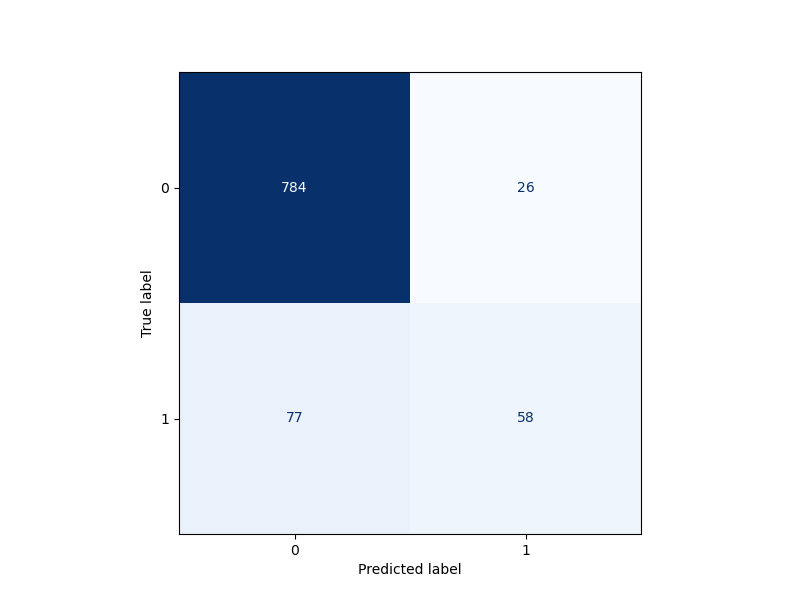

In [9]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [10]:
cm

array([[784,  26],
       [ 77,  58]], dtype=int64)

In [11]:
TP = cm[1, 1] # True Positives
TN = cm[0, 0] # True Negatives
FP = cm[0, 1] # False Positives
FN = cm[1, 0] # False Negatives

### Accuracy:

How often was the model correct?

In [12]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.8910


### Misclassification Rate:

How often was the model incorrect?

In [13]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.1090


### Precision: 

When a positive value is predicted, how often is the prediction correct?

In other wordes: How "precise" is the classifier when predicting positive instances?

In [14]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.6905


### Recall (aka sensititivy):

Ability of a classification model to identify all relevant instances. 
Also referred to as Sensitivity, Probability of Detection, True Positive Rate


In [15]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.4296


### F1 Score

This is a measure that takes the harmonic mean of precision and recall.

In [16]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.5297


Recall is 0.4296 and F1 Score is 0.5297 for the logistic regression model, which is not the optimal performance business expects. High recall is needed for business but the recall is poor and F1 score is also poor. in the precision recall curve area under the curve is also less. this model is not performing that good with the data. we will compare this performance with other models. 

# Fit the SVM model

 we will try to fit both linear and non linear models and try to compare the performance, will start with linear kernel first

### Using Linear Kernel

In [17]:
svc_linear=SVC(kernel='linear')
#train the model
svc_linear.fit(X_train,y_train)
#predictions
y_pred_linear=svc_linear.predict(X_test)

### What would the expected returns from using our model?

Let's look at the confusion matrix of the performance of the model on the test data.

In [18]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred_linear
results.head(20)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,0
9,0,0


## Measure performance of model using confusion matrix

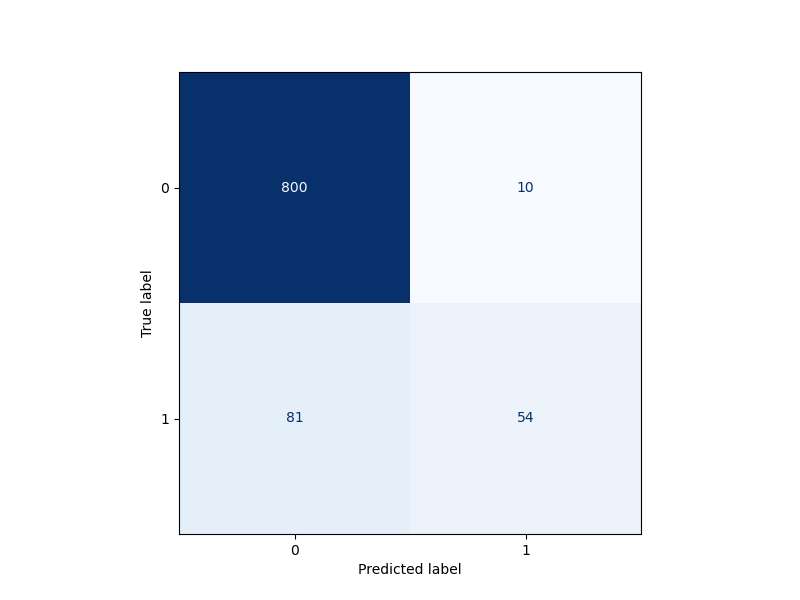

In [19]:
# display the confusion matrix
conf_matrix_svc_linear = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [20]:
conf_matrix_svc_linear

array([[800,  10],
       [ 81,  54]], dtype=int64)

In [21]:
TP = conf_matrix_svc_linear[1, 1] # True Positives
TN = conf_matrix_svc_linear[0, 0] # True Negatives
FP = conf_matrix_svc_linear[0, 1] # False Positives
FN = conf_matrix_svc_linear[1, 0] # False Negatives

### Accuracy:

How often was the model correct?

In [22]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.9037


### Misclassification Rate:

How often was the model incorrect?

In [23]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.0963


### Precision: 

When a positive value is predicted, how often is the prediction correct?

In other wordes: How "precise" is the classifier when predicting positive instances?

In [24]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.8438


### Recall (aka sensititivy):

Ability of a classification model to identify all relevant instances. 
Also referred to as Sensitivity, Probability of Detection, True Positive Rate


In [25]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.4000


### F1 Score

This is a measure that takes the harmonic mean of precision and recall.

In [26]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.5427


In [27]:
conf_matrix_svc_linear 

array([[800,  10],
       [ 81,  54]], dtype=int64)

Recall is 0.400 and F1 score is 0.5427 values are quite similar to what we have seen for logistic model. 
this performance is also considered poor and business would not like it. We need model to have high recall. we will try to fit non linear and compare the performances.

### Using Non-Linear Kernel

In [28]:
svc_rbf=SVC(kernel='rbf')
#train the model
svc_rbf.fit(X_train,y_train)
#predictions
y_pred_rbf=svc_rbf.predict(X_test)

### What would the expected returns from using our model?

Let's look at the confusion matrix of the performance of the model on the test data.

In [29]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred_rbf
results.head(20)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,0
9,0,0


## Measure performance of model using confusion matrix

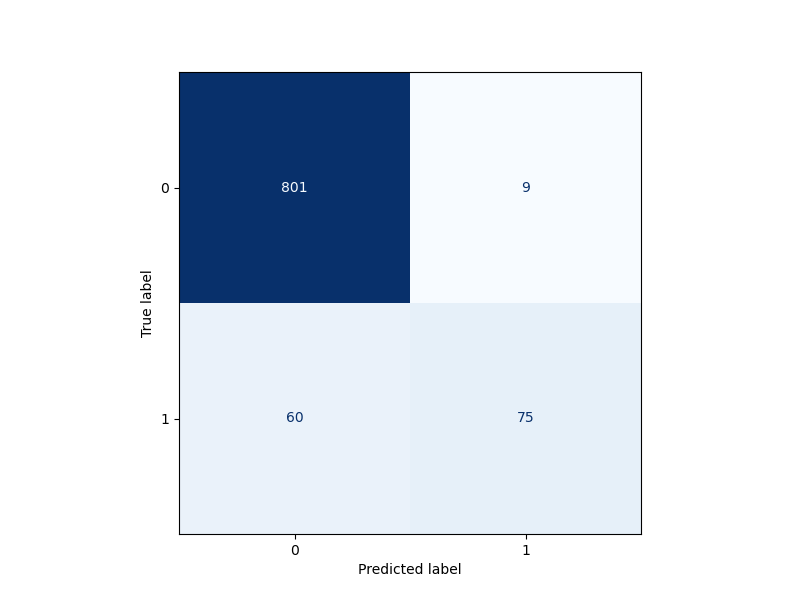

In [30]:
# display the confusion matrix
conf_matrix_svc_rbf = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [31]:
conf_matrix_svc_rbf

array([[801,   9],
       [ 60,  75]], dtype=int64)

In [32]:
TP = conf_matrix_svc_rbf[1, 1] # True Positives
TN = conf_matrix_svc_rbf[0, 0] # True Negatives
FP = conf_matrix_svc_rbf[0, 1] # False Positives
FN = conf_matrix_svc_rbf[1, 0] # False Negatives

### Accuracy:

How often was the model correct?

In [33]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.9270


### Misclassification Rate:

How often was the model incorrect?

In [34]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.0730


### Precision: 

When a positive value is predicted, how often is the prediction correct?

In other wordes: How "precise" is the classifier when predicting positive instances?

In [35]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.8929


### Recall (aka sensititivy):

Ability of a classification model to identify all relevant instances. 
Also referred to as Sensitivity, Probability of Detection, True Positive Rate


In [36]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.5556


### F1 Score

This is a measure that takes the harmonic mean of precision and recall.

In [37]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.6849


SVM non linear model performed better than earlier models with better recall value of 0.5556 and F1 score of 0.6849.but this is not the optimal performance required. we will try to fit decision tree model and compare the performance

# Decision Tree Model

In [38]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred_dtree=decision_tree.predict(X_test)

### What would the expected returns from using our model?

Let's look at the confusion matrix of the performance of the model on the test data.

In [39]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred_dtree
results.head(20)

,actual,predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


## Measure performance of model using confusion matrix

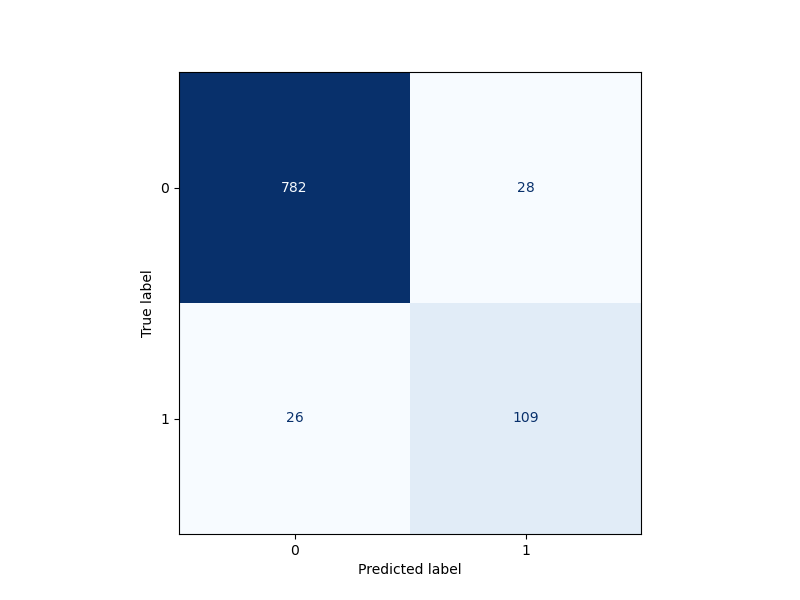

In [40]:
# display the confusion matrix
conf_matrix_dtree = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [41]:
# Evaluate the model's performance
score = decision_tree.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")

Model Accuracy: 0.94


In [42]:
TP = conf_matrix_dtree[1, 1] # True Positives
TN = conf_matrix_dtree[0, 0] # True Negatives
FP = conf_matrix_dtree[0, 1] # False Positives
FN = conf_matrix_dtree[1, 0] # False Negatives

### Accuracy:

How often was the model correct?

In [43]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.9429


### Misclassification Rate:

How often was the model incorrect?

In [44]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.0571


### Precision: 

When a positive value is predicted, how often is the prediction correct?

In other wordes: How "precise" is the classifier when predicting positive instances?

In [45]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.7956


### Recall (aka sensititivy):

Ability of a classification model to identify all relevant instances. 
Also referred to as Sensitivity, Probability of Detection, True Positive Rate


In [46]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.8074


### F1 Score

This is a measure that takes the harmonic mean of precision and recall.

In [47]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.8015


Decision Tree performed best of all the models even though accuracy and precision reduced compared to SVM model, recall and F1 score imporved a lot with recall of 0.8074 and F1 score of 0.8015. This is the best model for business so far. We will use hyperparameter tuning and better the performance

## Prediction with Decision Tree (using hyperparameter tuning)

This section demonstrates how to refine the performance of a decision tree using hyperparameter tuning techniques. 

This section doesn't duplicate the data loading, cleaning, and splitting of the first section. This section shows how to create and test a random forest classifier using best_random_search_modelCV and best_grid_search_modelCV techniques. 

Both best_random_search_modelCV and best_grid_search_modelCV test different model parameters. These help to determine the parameters that produce the best performing model.

###  Determine the parameters that can be "tuned"

You can review the parameters of the model which you're trying to "tune". In this case, we're using a DecisionTreeClassifier. Begin by reviewing the parameters for this model found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

After reviewing these parameters (while also understanding something about DecisionTrees), we can identify the following parameters that could affect model fit. 

* criterion
* max_depth
* min_samples_split
* min_samples_leaf
* max_leaf_nodes
* min_impurity_decrease



###  Create an initial 'wide' range of possible hyperparameter values

Here we create a wide range of possible parameter values for each of the hyperparameters we've listed above. 


In [48]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 50, 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 50, 5)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 50, 5)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



###  Use Randomize Search to narrow the possible range of parameter values


In [49]:
dtree_default = DecisionTreeClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 20, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

In [50]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 38, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0035, 'max_leaf_nodes': 521, 'max_depth': 37, 'criterion': 'entropy'}


###  Test the performance of the selected parameters

In [51]:
y_pred_random = best_random_search_model.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_random)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_random)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_random)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_random)}")
print("************************************")

************************************
Recall Score:     0.8074074074074075
************************************
Accuracy Score:   0.9248677248677248
Precision Score:  0.7077922077922078
F1 Score:         0.754325259515571
************************************


Recall score is quite similar to what we had before and with hyperparameter tuning we reduced overfitting, increased robustness and convergernce, model performance as well.

###  Use knowledge gained from random search to create new 'narrow' range of possible hyperparameter values and use best_grid_search_model to fine tune the model.

The best parameters found using RandomizedSearchCV were:

In [52]:
random_search_best_params

{'min_samples_split': 38,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0035,
 'max_leaf_nodes': 521,
 'max_depth': 37,
 'criterion': 'entropy'}

Let's now use these current best parameters as a starting point for a more refined grid search. We'll use the same parameters as before, but we'll use a much smaller range of values for each parameter.

NOTE: Depending on the speed of your computer, the following code could take 5-20 minutes to run.

In [53]:
plus_minus = 5 # change this to 10-15 when doing a final run. this current value is for testing
increment = 2

param_grid = { 'min_samples_split': [x for x in range(random_search_best_params['min_samples_split']-plus_minus, random_search_best_params['min_samples_split']+plus_minus,2) if x >= 2],       
              'min_samples_leaf': [x for x in range(random_search_best_params['min_samples_leaf']-plus_minus , random_search_best_params['min_samples_leaf']+plus_minus,2) if x > 0],
              'min_impurity_decrease': [x for x in np.arange(random_search_best_params['min_impurity_decrease']-0.001, random_search_best_params['min_impurity_decrease']+0.001,.0001).round(5) if x >= 0.000],
              'max_leaf_nodes':[x for x in range(random_search_best_params['max_leaf_nodes']-plus_minus , random_search_best_params['max_leaf_nodes']+plus_minus, 2) if x > 1],  
              'max_depth': [x for x in range(random_search_best_params['max_depth']-plus_minus , random_search_best_params['max_depth']+plus_minus, 2) if x > 1],
              'criterion': [random_search_best_params['criterion']]
              }

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), 
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(X_train, y_train)

In [54]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 32, 'max_leaf_nodes': 516, 'min_impurity_decrease': 0.0028, 'min_samples_leaf': 2, 'min_samples_split': 33}


###  Test the performance of the model using identified parameters

In [55]:
y_pred_grid = best_grid_search_model.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_grid)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_grid)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_grid)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_grid)}")
print("************************************")

************************************
Recall Score:     0.8074074074074075
************************************
Accuracy Score:   0.9248677248677248
Precision Score:  0.7077922077922078
F1 Score:         0.754325259515571
************************************


Recall score is quite similar to what we had before and with hyperparameter tuning we reduced overfitting, increased robustness and convergernce, model performance as well.

# Logistic Regression Hyperparameter tuning

This section demonstrates how to refine the performance of a Logistic Regression using hyperparameter tuning techniques. 

This section doesn't duplicate the data loading, cleaning, and splitting of the first section. This section shows how to create and test a random forest classifier using best_random_search_modelCV and best_grid_search_modelCV techniques. 

Both best_random_search_modelCV and best_grid_search_modelCV test different model parameters. These help to determine the parameters that produce the best performing model.

###  Determine the parameters that can be "tuned"

You can review the parameters of the model which you're trying to "tune". In this case, we're using a Logistic Regression

After reviewing these parameters (while also understanding something about DecisionTrees), we can identify the following parameters that could affect model fit. 

* C  # Range of regularization parameter
    
* penalty # Regularization type



###  Use Randomize Search to narrow the possible range of parameter values


In [56]:
# Define hyperparameter ranges to search
param_dist = {
     'C': np.logspace(-3, 2, 100),  # Range of regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 200]  # Number of iterations
}

# Create a Random Search object
random_search = RandomizedSearchCV(LogisticRegression(max_iter=100,n_jobs=-1), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model with data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)


Best hyperparameters: {'penalty': 'l2', 'max_iter': 100, 'C': 13.848863713938718}


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

###  Test the performance of the selected parameters

In [57]:
print("Random Search - Best Parameters:")
print(random_search.best_params_)

# Evaluate the model with the best parameters on the test set
random_best_model = random_search.best_estimator_
y_pred = random_best_model.predict(X_test)
print("Random Search - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Random Search - Test Recall:", recall_score(y_test, y_pred))
print("Random Search - Test Precision:", precision_score(y_test, y_pred ))
print("Random Search - Test F1 Score:", f1_score(y_test, y_pred))


Random Search - Best Parameters:
{'penalty': 'l2', 'max_iter': 100, 'C': 13.848863713938718}
Random Search - Test Accuracy: 0.8899470899470899
Random Search - Test Recall: 0.43703703703703706
Random Search - Test Precision: 0.6781609195402298
Random Search - Test F1 Score: 0.5315315315315315


###  Use Grid Search to get possible grid of parameters

In [58]:
# Create a parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

grid_search = GridSearchCV(LogisticRegression(max_iter=100, n_jobs=-1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Grid Search - Best Parameters:")
print(grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
grid_best_model = grid_search.best_estimator_
y_pred = grid_best_model.predict(X_test)
print("Grid Search - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Grid Search - Test Recall:", recall_score(y_test, y_pred))
print("Grid Search - Test Precision:", precision_score(y_test, y_pred))
print("Grid Search - Test F1 Score:", f1_score(y_test, y_pred))

Grid Search - Best Parameters:
{'C': 10, 'penalty': 'l2'}
Grid Search - Test Accuracy: 0.8899470899470899
Grid Search - Test Recall: 0.43703703703703706
Grid Search - Test Precision: 0.6781609195402298
Grid Search - Test F1 Score: 0.5315315315315315


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

# SVM Hyperparameter Tuning

In [59]:
### Grid and Random Search Parameters

# Create a parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1, 10, 'scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create a parameter distribution for random search
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1, 10, 'scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}


### Random Search

In [65]:
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=30, cv=5)
random_search.fit(X_train, y_train)

print("Random Search - Best Parameters:")
print(random_search.best_params_)

# Evaluate the model with the best parameters on the test set
random_best_model = random_search.best_estimator_
y_pred = random_best_model.predict(X_test)
print("Random Search - Recall score:", recall_score(y_test, y_pred))

# Get the best hyperparameters from the random search
random_search_best_params = random_search.best_params_

print(random_search_best_params)

Random Search - Best Parameters:
{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Random Search - Recall score: 0.8888888888888888
{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}


###  Use knowledge gained from random search to create new 'narrow' range of possible hyperparameter values and use best_grid_search_model to fine tune the model.

The best parameters found using RandomizedSearchCV were:

In [62]:
random_search_best_params

{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}

Let's now use these current best parameters as a starting point for a more refined grid search. We'll use the same parameters as before, but we'll use a much smaller range of values for each parameter.

NOTE: Depending on the speed of your computer, the following code could take 5-20 minutes to run.

In [66]:
# Get the best hyperparameters from the random search
random_search_best_params = random_search.best_params_

# Define a narrower grid for GridSearchCV based on the best hyperparameters from random search
param_grid_for_grid = {
    'C': [random_search_best_params['C'], random_search_best_params['C'] * 2, random_search_best_params['C'] / 2],
    'kernel': [random_search_best_params['kernel']],
    'gamma': [random_search_best_params['gamma']]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Grid Search - Best Parameters:")
print(grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
grid_best_model = grid_search.best_estimator_
y_pred = grid_best_model.predict(X_test)
print("Grid Search - Recall SCore:", recall_score(y_test, y_pred))

Grid Search - Best Parameters:
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Grid Search - Recall SCore: 0.8888888888888888


# Analysis Conclusion :

The business requirement in this dataset is prediciting whether customer will churn based on the features. As Business does not want to lose customers, they want to identify potential churn out customers and make them non churn. So in this case High recall is the metric of Business requirement so we are evaluating model's performance based on recall. Decision Tree is the best model which had better recall compared to others but with chance of decision tree as our dataset is not that big even though we did train/test split there will be chances of overfit. but we did hyperparameters tuning and avoided overfitting with model giving best possible performance. After hyperparameters tuning applied on decision tree model it becomes better than the model without hyperparamaters tuning, reduced overfitting, increased robustness and convergence. Overall model performance is improved with that. SVC model Random search CV and Grid search gave us a recall score of 0.88 which is better than decision tree model itself will become the best fit for business. 